<a href="https://colab.research.google.com/github/devanr29/Air-Quality/blob/main/AirQualityProject.mei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-tahun-2018-2021x.csv to indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-tahun-2018-2021x (3).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder , PolynomialFeatures
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv ("indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-tahun-2018-2021x.csv")
df

tanggal  pm10   so2    co     o3   no2  max critical  \
0       8/1/2018    86  31.0  21.0  129.0  24.0  129       O3   
1       8/2/2018    68  31.0  18.0  207.0  20.0  207       O3   
2       8/3/2018    68  32.0  16.0  211.0  17.0  211       O3   
3       8/4/2018    59  31.0  16.0  194.0  16.0  194       O3   
4       8/5/2018    65  35.0  14.0  203.0  16.0  203       O3   
...          ...   ...   ...   ...    ...   ...  ...      ...   
1283  12/27/2021    75  61.0  23.0   40.0  47.0  121     PM25   
1284  12/28/2021    59  53.0  16.0   34.0  33.0   89     PM25   
1285  12/29/2021    61  54.0  15.0   37.0  29.0   98     PM25   
1286  12/30/2021    60  53.0  17.0   38.0  44.0  102     PM25   
1287  12/31/2021    64  52.0  44.0   37.0  53.0   90     PM25   

                categori lokasi_spku  
0            TIDAK SEHAT        DKI5  
1     SANGAT TIDAK SEHAT        DKI5  
2     SANGAT TIDAK SEHAT        DKI2  
3            TIDAK SEHAT        DKI5  
4     SANGAT TIDAK SEHAT        DKI2  
...                  ...         ...  
1283         TIDAK SEHAT        DKI4  
1284              SEDANG        DKI4  
1285              SEDANG        DKI4  
1286         TIDAK SEHAT        DKI4  
1287              SEDANG        DKI4  

[1288 rows x 10 columns]

In [ ]:
df.head()

tanggal  pm10   so2    co     o3   no2  max critical            categori  \
0  8/1/2018    86  31.0  21.0  129.0  24.0  129       O3         TIDAK SEHAT   
1  8/2/2018    68  31.0  18.0  207.0  20.0  207       O3  SANGAT TIDAK SEHAT   
2  8/3/2018    68  32.0  16.0  211.0  17.0  211       O3  SANGAT TIDAK SEHAT   
3  8/4/2018    59  31.0  16.0  194.0  16.0  194       O3         TIDAK SEHAT   
4  8/5/2018    65  35.0  14.0  203.0  16.0  203       O3  SANGAT TIDAK SEHAT   

  lokasi_spku  
0        DKI5  
1        DKI5  
2        DKI2  
3        DKI5  
4        DKI2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tanggal      1288 non-null   object 
 1   pm10         1288 non-null   int64  
 2   so2          1288 non-null   float64
 3   co           1288 non-null   float64
 4   o3           1288 non-null   float64
 5   no2          1288 non-null   float64
 6   max          1288 non-null   int64  
 7   critical     1288 non-null   object 
 8   categori     1288 non-null   object 
 9   lokasi_spku  1288 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 100.8+ KB


In [ ]:
df.shape

(1288, 10)

In [ ]:
df.duplicated(). sum()

0

In [ ]:
df.isnull().sum()

tanggal        0
pm10           0
so2            0
co             0
o3             0
no2            0
max            0
critical       0
categori       0
lokasi_spku    0
dtype: int64

In [ ]:
df['categori'].unique()

array(['TIDAK SEHAT', 'SANGAT TIDAK SEHAT', 'SEDANG', 'BAIK'],
      dtype=object)

In [ ]:
df['critical'].unique()

array(['O3', 'PM10', 'CO', 'SO2', 'PM25', 'PM26'], dtype=object)

In [ ]:
df['lokasi_spku'].unique()

array(['DKI5', 'DKI2', 'DKI3', 'DKI4', 'DKI1'], dtype=object)

In [ ]:
df.describe()

pm10          so2           co           o3          no2  \
count  1288.000000  1288.000000  1288.000000  1288.000000  1288.000000   
mean     63.005435    35.644410    21.744565    91.708075    20.303571   
std      14.864604    13.652564     9.936588    45.500243    12.806622   
min      19.000000    12.000000     0.000000    20.000000     3.000000   
25%      55.000000    26.000000    16.000000    56.000000    13.000000   
50%      64.000000    31.000000    20.000000    80.000000    17.000000   
75%      73.000000    43.250000    25.000000   120.000000    23.000000   
max     179.000000   126.000000    88.000000   243.000000   134.000000   

               max  
count  1288.000000  
mean    104.979814  
std      38.500825  
min      31.000000  
25%      77.000000  
50%      96.000000  
75%     126.000000  
max     243.000000

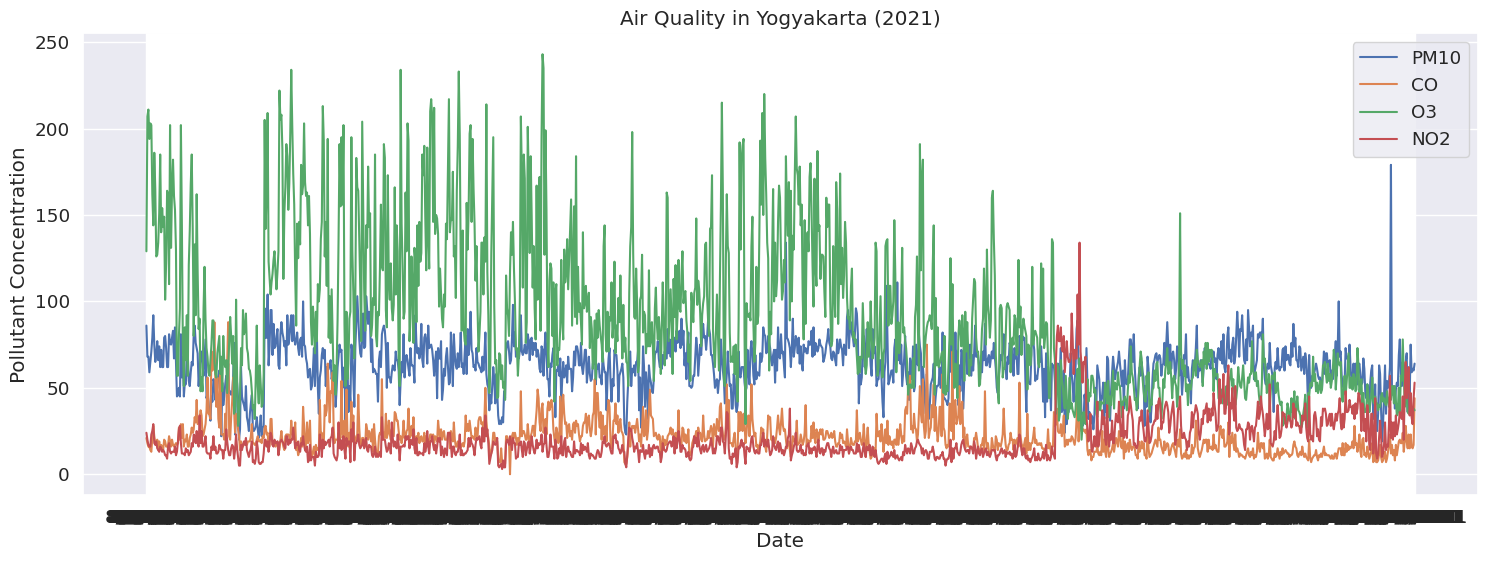

In [ ]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x='tanggal', y='pm10', label='PM10')
sns.lineplot(data=df, x='tanggal', y='co', label='CO')
sns.lineplot(data=df, x='tanggal', y='o3', label='O3')
sns.lineplot(data=df, x='tanggal', y='no2', label='NO2')
plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.title('Air Quality in Yogyakarta (2021)')
plt.legend()
plt.show()

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Kolom '{column}':")
    print(unique_values)
    print()

Kolom 'tanggal':
['8/1/2018' '8/2/2018' '8/3/2018' ... '12/29/2021' '12/30/2021'
 '12/31/2021']

Kolom 'pm10':
[ 86  68  59  65  71  79  92  75  69  77  66  74  62  72  80  73  81  76
  83  67  85  45  46  50  56  53  52  54  51  63  70  61  57  78  44  47
  42  35  31  55  43  48  60  22  40  64  23  20  26  37  33  30  25  41
  27  28  21  34  96 104  95  87  84  88  82 100  49  39  36 103  91  93
  94  58  29  98  24  32  90  89  38 134 109 111  19 179]

Kolom 'so2':
[ 31.  32.  35.  34.  33.  37.  30.  25.  27.  26.  28.  29.  36.  58.
  56.  22.  24.  23.  43.  45.  44.  47.  46.  48.  50.  49.  21.  38.
  72.  70.  52.  51.  53.  54.  55.  41.  40.  12.  18.  20.  39.  19.
  15.  17.  16.  13.  60.  42.  86.  93.  67.  89.  81.  68.  77.  78.
  82.  92.  64. 112. 126.  90.  95.  79.  59.  63.  61.  57.  62.  74.
  66.  76.  65.  73.  80.]

Kolom 'co':
[21. 18. 16. 14. 13. 28. 22. 17. 20. 19. 15. 27. 29. 23. 24. 26. 33. 30.
 43. 37. 34. 56. 35. 32. 71. 60. 62. 88. 52. 39. 63. 66. 

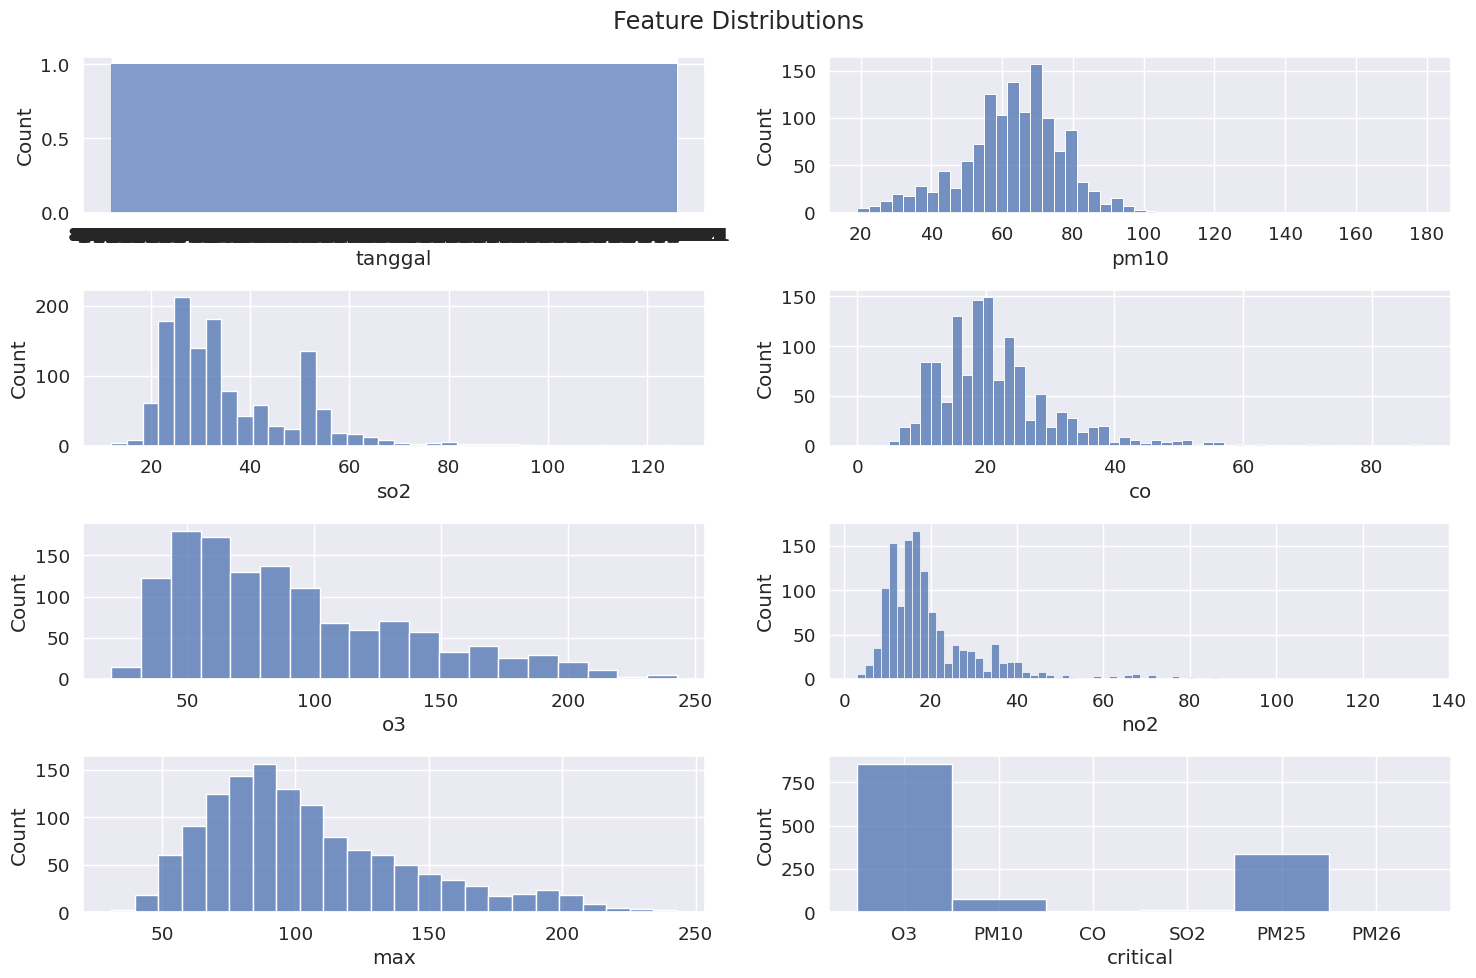

In [ ]:
n_rows = 4
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15,10))

for i in range(n_rows):
  for j in range(n_cols):
    feature = df.columns[i*n_cols+j]
    sns.histplot(x=df[feature], ax=axs[i][j])

fig.suptitle("Feature Distributions")
fig.tight_layout()
fig.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


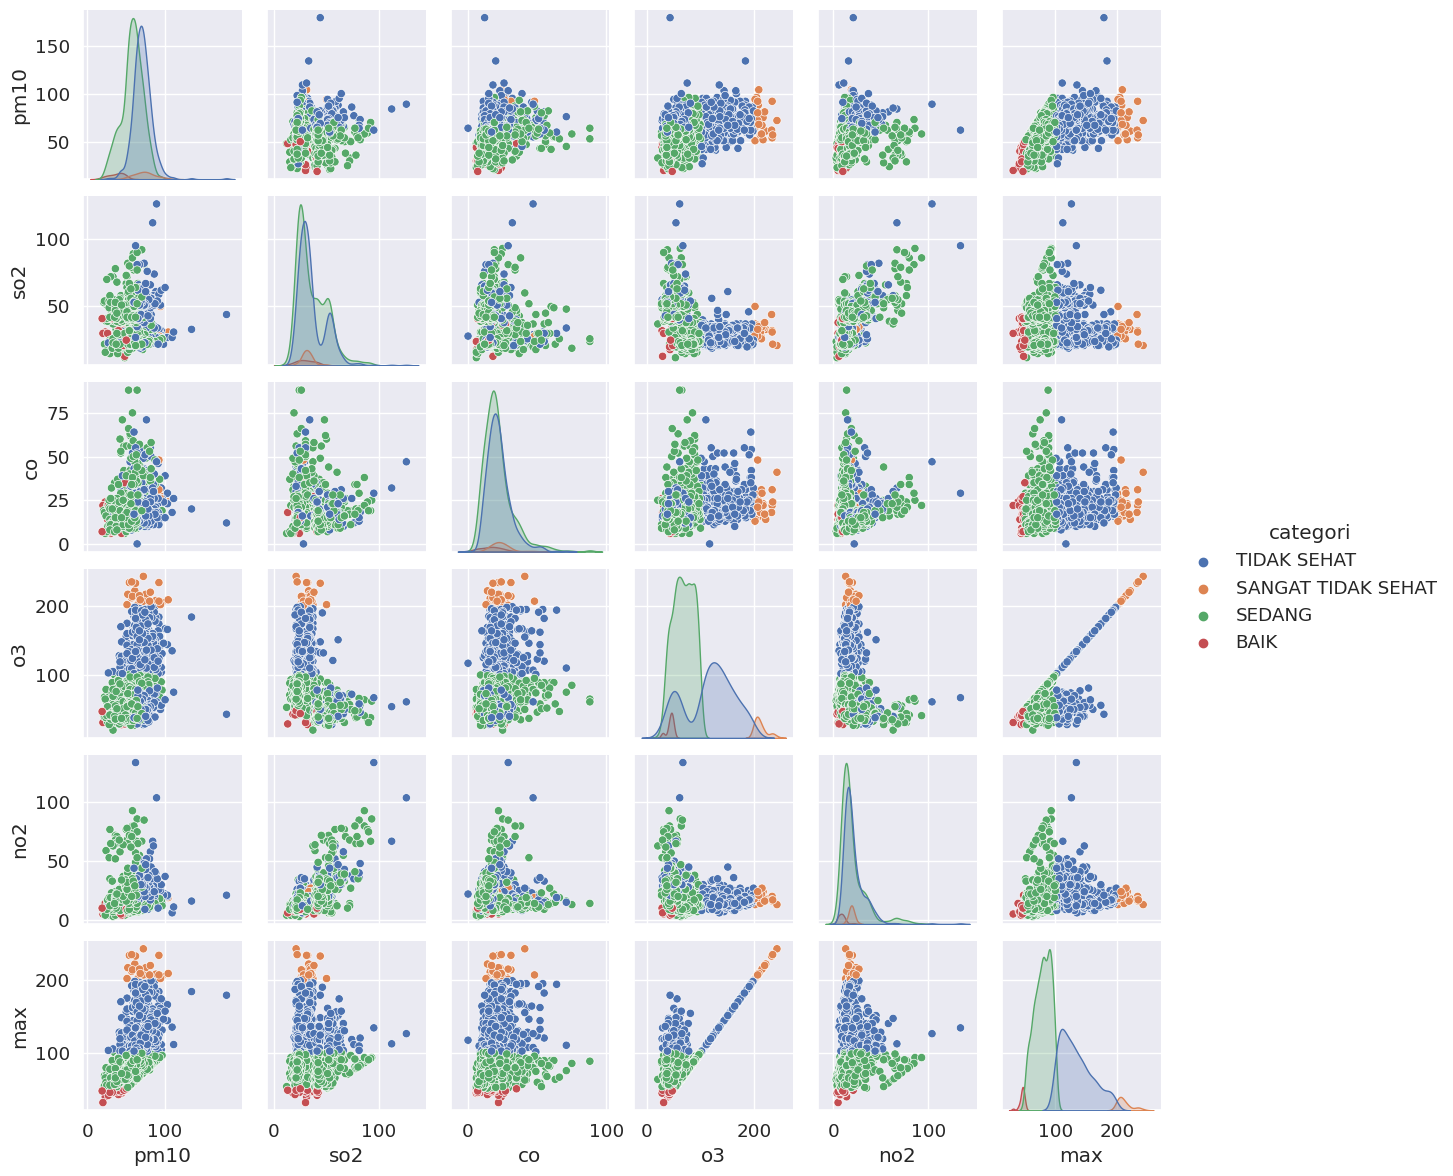

In [ ]:
sns.pairplot(df, hue="categori", size=2)
plt.show()

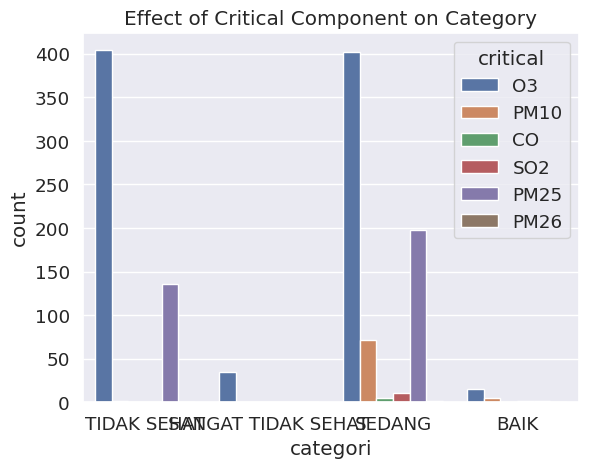

In [ ]:
sns.countplot(data=df, x="categori", hue="critical")
plt.title("Effect of Critical Component on Category")
plt.show()

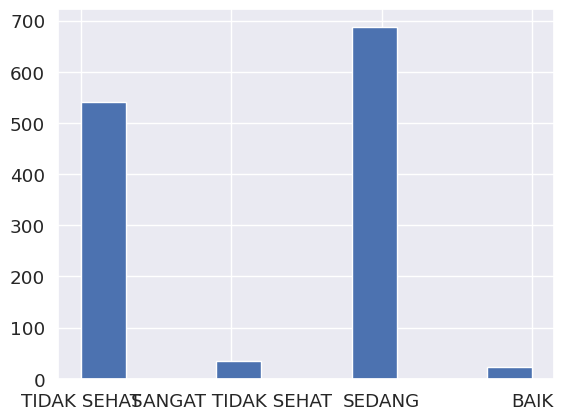

In [ ]:
df["categori"].hist()
plt.show()

In [ ]:
processed_data = df.copy()
processed_data["critical"] = LabelEncoder().fit_transform(processed_data["critical"])

label_map = {
    "SANGAT TIDAK SEHAT": 1,
    "TIDAK SEHAT": 2,
    "SEDANG": 3,
    "BAIK" : 4
}
processed_data = processed_data.replace({"categori": label_map})

processed_data.head()

tanggal  pm10   so2    co     o3   no2  max  critical  categori  \
0  8/1/2018    86  31.0  21.0  129.0  24.0  129         1         2   
1  8/2/2018    68  31.0  18.0  207.0  20.0  207         1         1   
2  8/3/2018    68  32.0  16.0  211.0  17.0  211         1         1   
3  8/4/2018    59  31.0  16.0  194.0  16.0  194         1         2   
4  8/5/2018    65  35.0  14.0  203.0  16.0  203         1         1   

  lokasi_spku  
0        DKI5  
1        DKI5  
2        DKI2  
3        DKI5  
4        DKI2

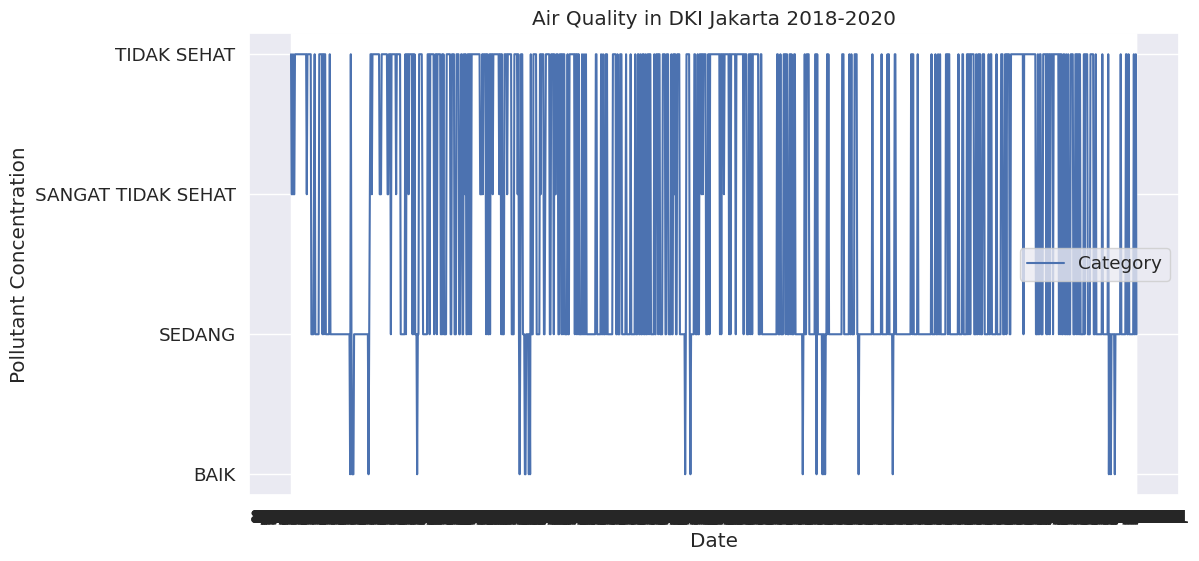

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='tanggal', y='categori', label='Category')
plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.title('Air Quality in DKI Jakarta 2018-2020')
plt.legend()
plt.show()

<ipython-input-166-3707ac2ff249>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(processed_data.corr(), annot=True)


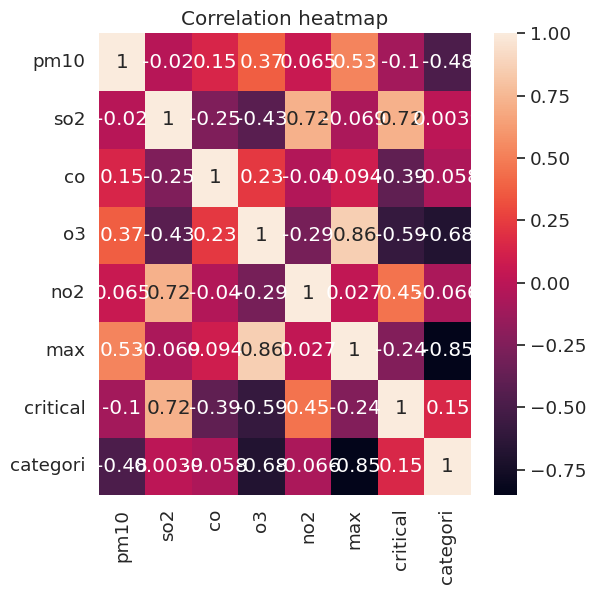

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(processed_data.corr(), annot=True)
plt.title("Correlation heatmap")
plt.show()

In [ ]:
processed_data = processed_data.drop(columns=["tanggal"])
processed_data.head()

pm10   so2    co     o3   no2  max  critical  categori lokasi_spku
0    86  31.0  21.0  129.0  24.0  129         1         2        DKI5
1    68  31.0  18.0  207.0  20.0  207         1         1        DKI5
2    68  32.0  16.0  211.0  17.0  211         1         1        DKI2
3    59  31.0  16.0  194.0  16.0  194         1         2        DKI5
4    65  35.0  14.0  203.0  16.0  203         1         1        DKI2

In [ ]:
processed_data = processed_data.drop(columns=["lokasi_spku"])
processed_data.head()

pm10   so2    co     o3   no2  max  critical  categori
0    86  31.0  21.0  129.0  24.0  129         1         2
1    68  31.0  18.0  207.0  20.0  207         1         1
2    68  32.0  16.0  211.0  17.0  211         1         1
3    59  31.0  16.0  194.0  16.0  194         1         2
4    65  35.0  14.0  203.0  16.0  203         1         1

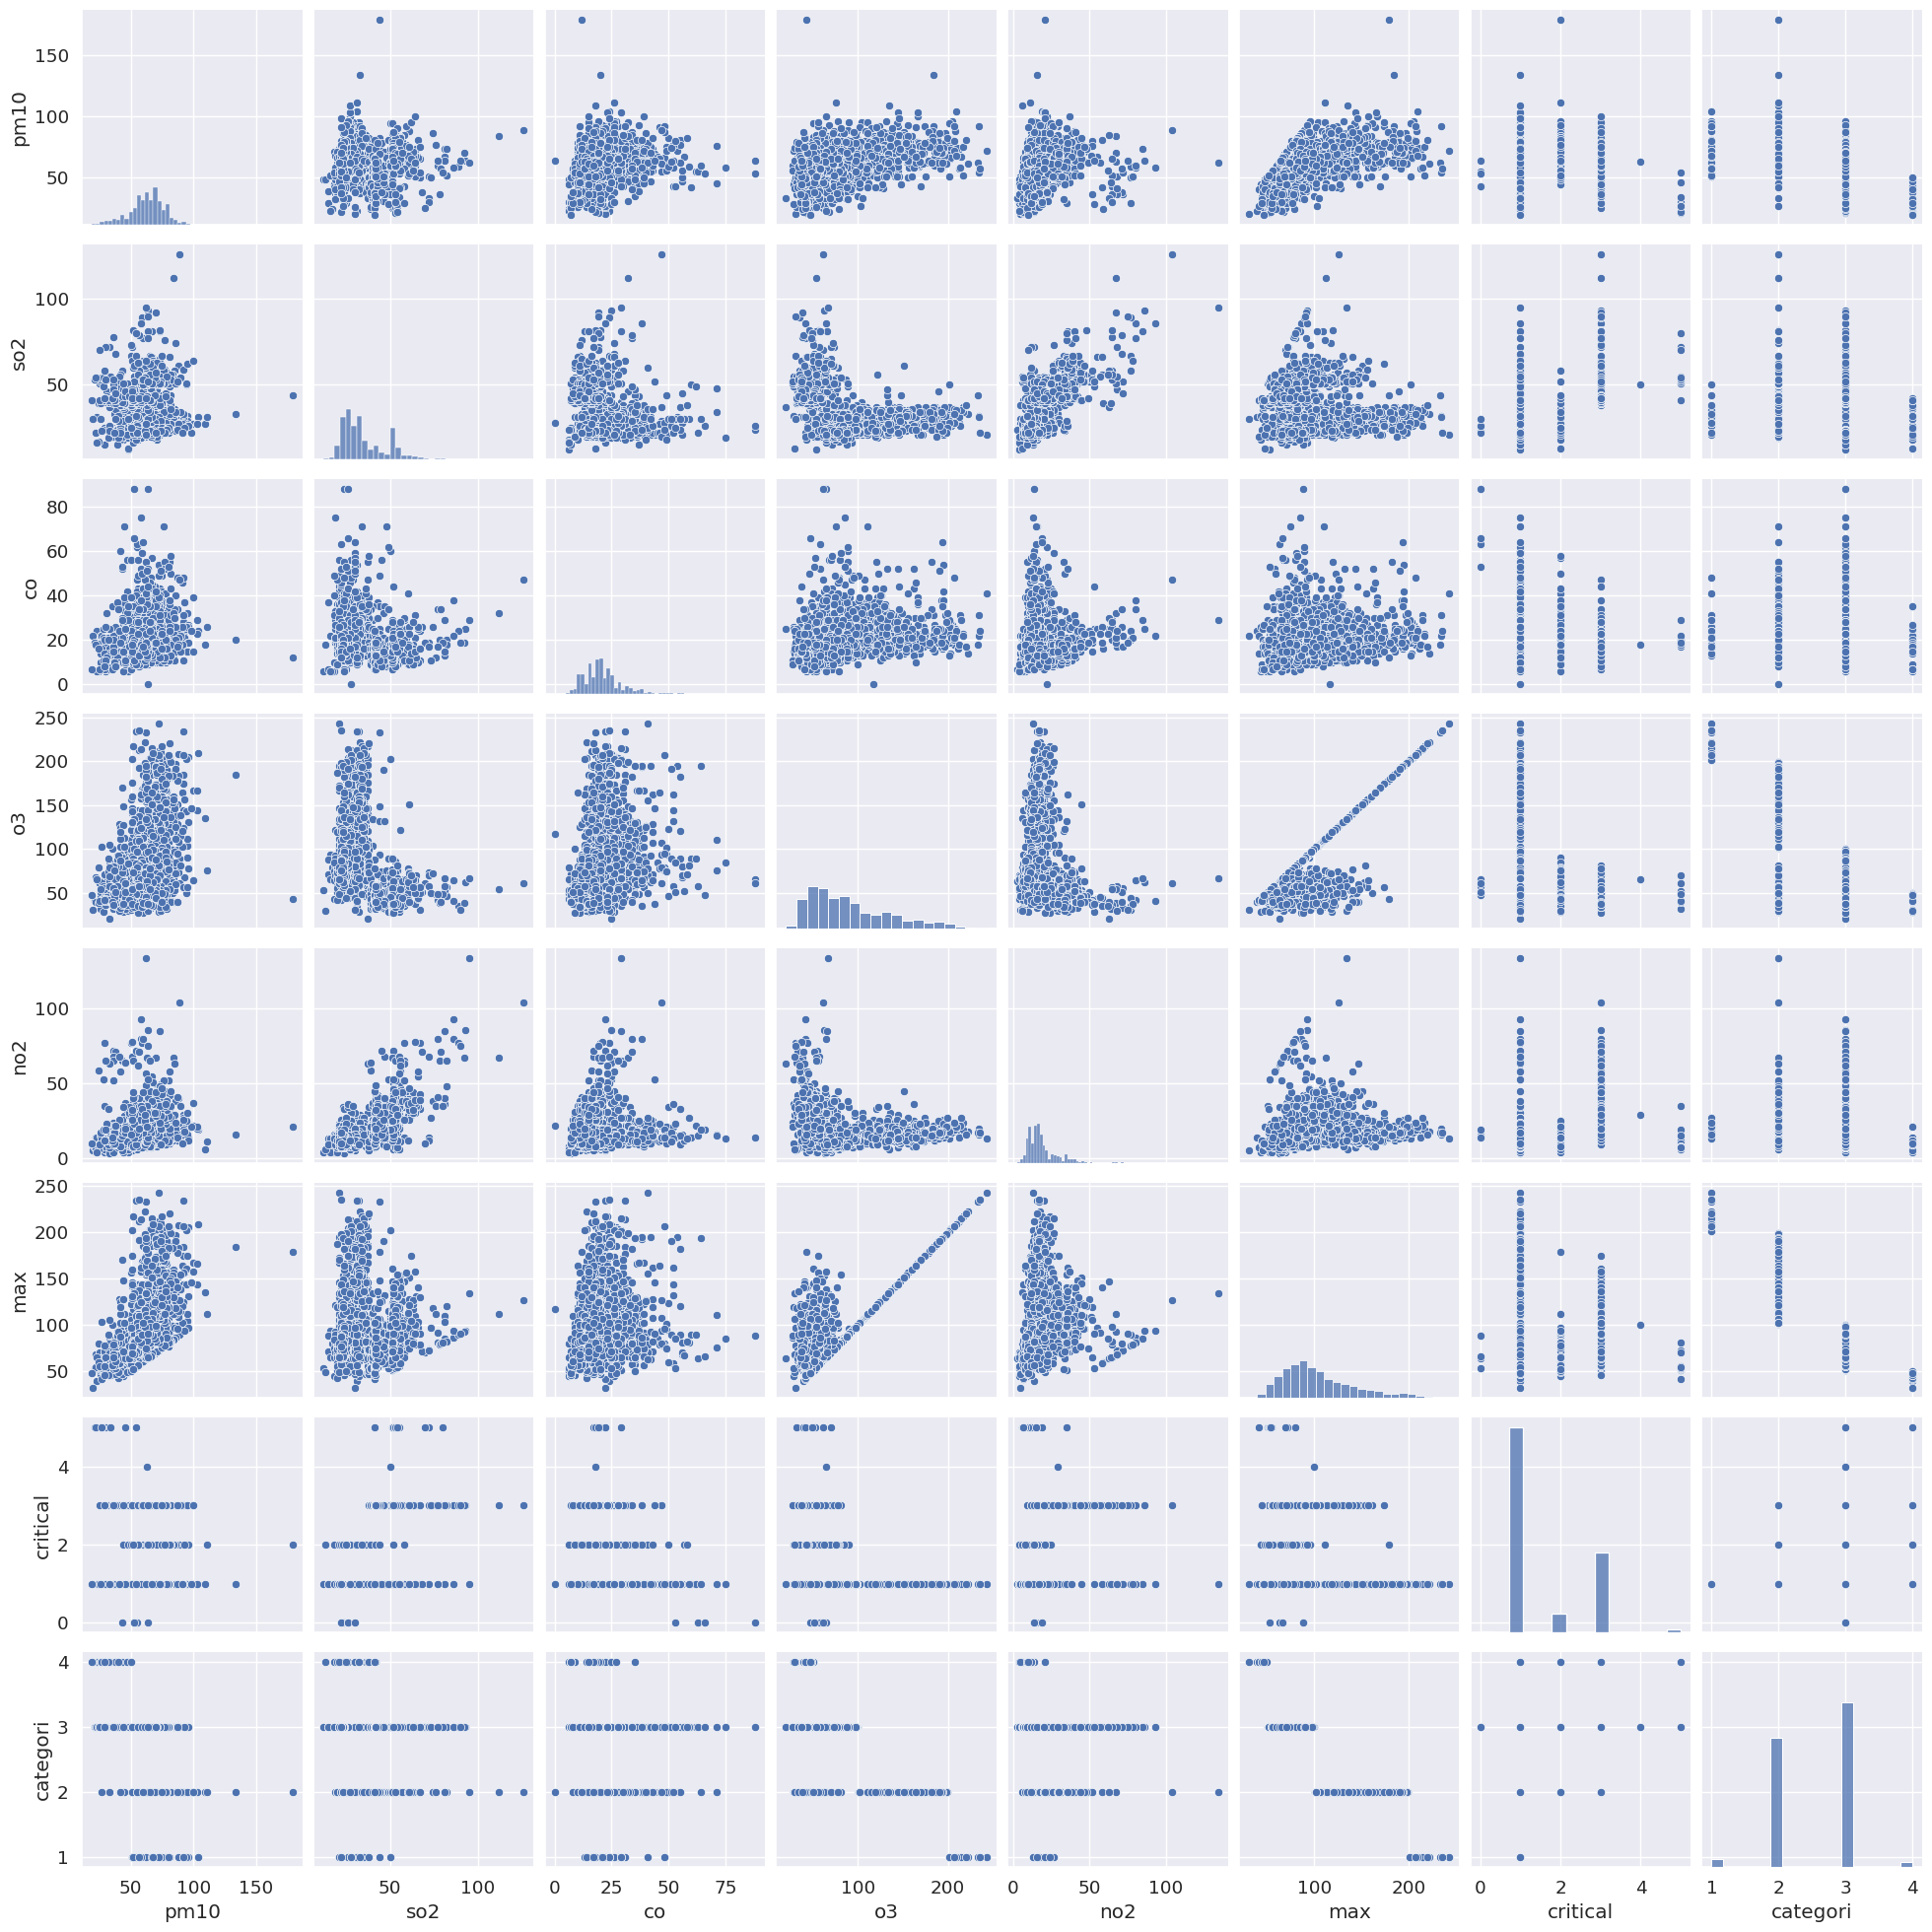

In [ ]:
sns.pairplot(processed_data)
plt.show()

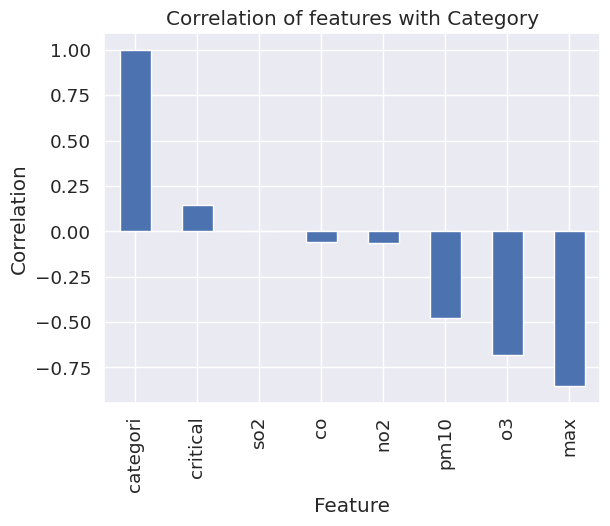

In [ ]:
target_corr = processed_data.corr()["categori"]
target_corr = target_corr.sort_values(ascending=False)
target_corr.plot(kind="bar")
plt.xlabel("Feature")
plt.ylabel("Correlation")
plt.title("Correlation of features with Category")
plt.show()

In [ ]:
X = processed_data[["o3", "co", "so2", "pm10"]]
y = processed_data["categori"]

print(X.shape)
print(y.shape)

(1288, 4)
(1288,)


In [ ]:
poly = PolynomialFeatures(2)
poly.fit(X)
poly_feats = pd.DataFrame(data=poly.transform(X), columns=poly.get_feature_names_out())
poly_feats = poly_feats.iloc[:, 1:]
print(poly_feats.shape)
poly_feats.head()

(1288, 14)


o3    co   so2  pm10     o3^2   o3 co  o3 so2  o3 pm10   co^2  co so2  \
0  129.0  21.0  31.0  86.0  16641.0  2709.0  3999.0  11094.0  441.0   651.0   
1  207.0  18.0  31.0  68.0  42849.0  3726.0  6417.0  14076.0  324.0   558.0   
2  211.0  16.0  32.0  68.0  44521.0  3376.0  6752.0  14348.0  256.0   512.0   
3  194.0  16.0  31.0  59.0  37636.0  3104.0  6014.0  11446.0  256.0   496.0   
4  203.0  14.0  35.0  65.0  41209.0  2842.0  7105.0  13195.0  196.0   490.0   

   co pm10   so2^2  so2 pm10  pm10^2  
0   1806.0   961.0    2666.0  7396.0  
1   1224.0   961.0    2108.0  4624.0  
2   1088.0  1024.0    2176.0  4624.0  
3    944.0   961.0    1829.0  3481.0  
4    910.0  1225.0    2275.0  4225.0

In [ ]:
poly_feats["category"] = y

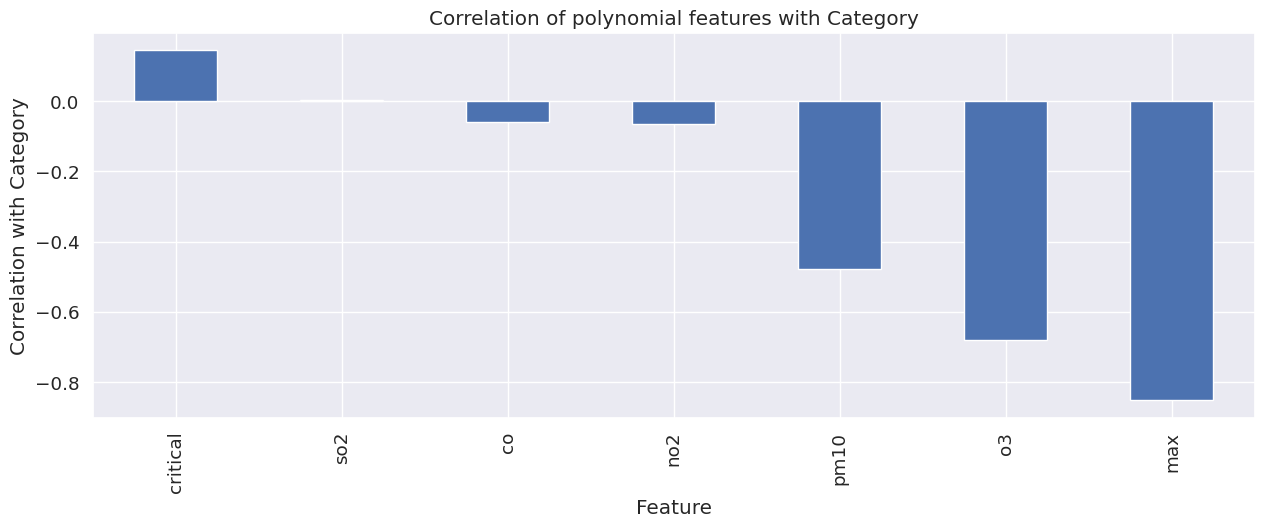

In [ ]:
target_corr = processed_data.corr()["categori"]
target_corr = target_corr.sort_values(ascending=False)

plt.figure(figsize=(15, 5))
target_corr[1:].plot(kind="bar")
plt.xlabel("Feature")
plt.ylabel("Correlation with Category")
plt.title("Correlation of polynomial features with Category")
plt.show()

Modelling


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

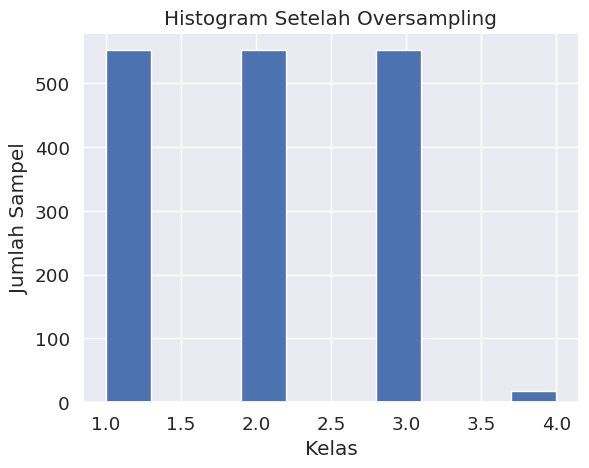

In [ ]:
oversampler = RandomOverSampler(sampling_strategy={1:552,2:552,3:552}, random_state=42)
X_train_resampled9, y_train_resampled9 = oversampler.fit_resample(X_train, y_train)
plt.hist(y_train_resampled9)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Histogram Setelah Oversampling')
plt.show()

<Figure size 1200x400 with 0 Axes>

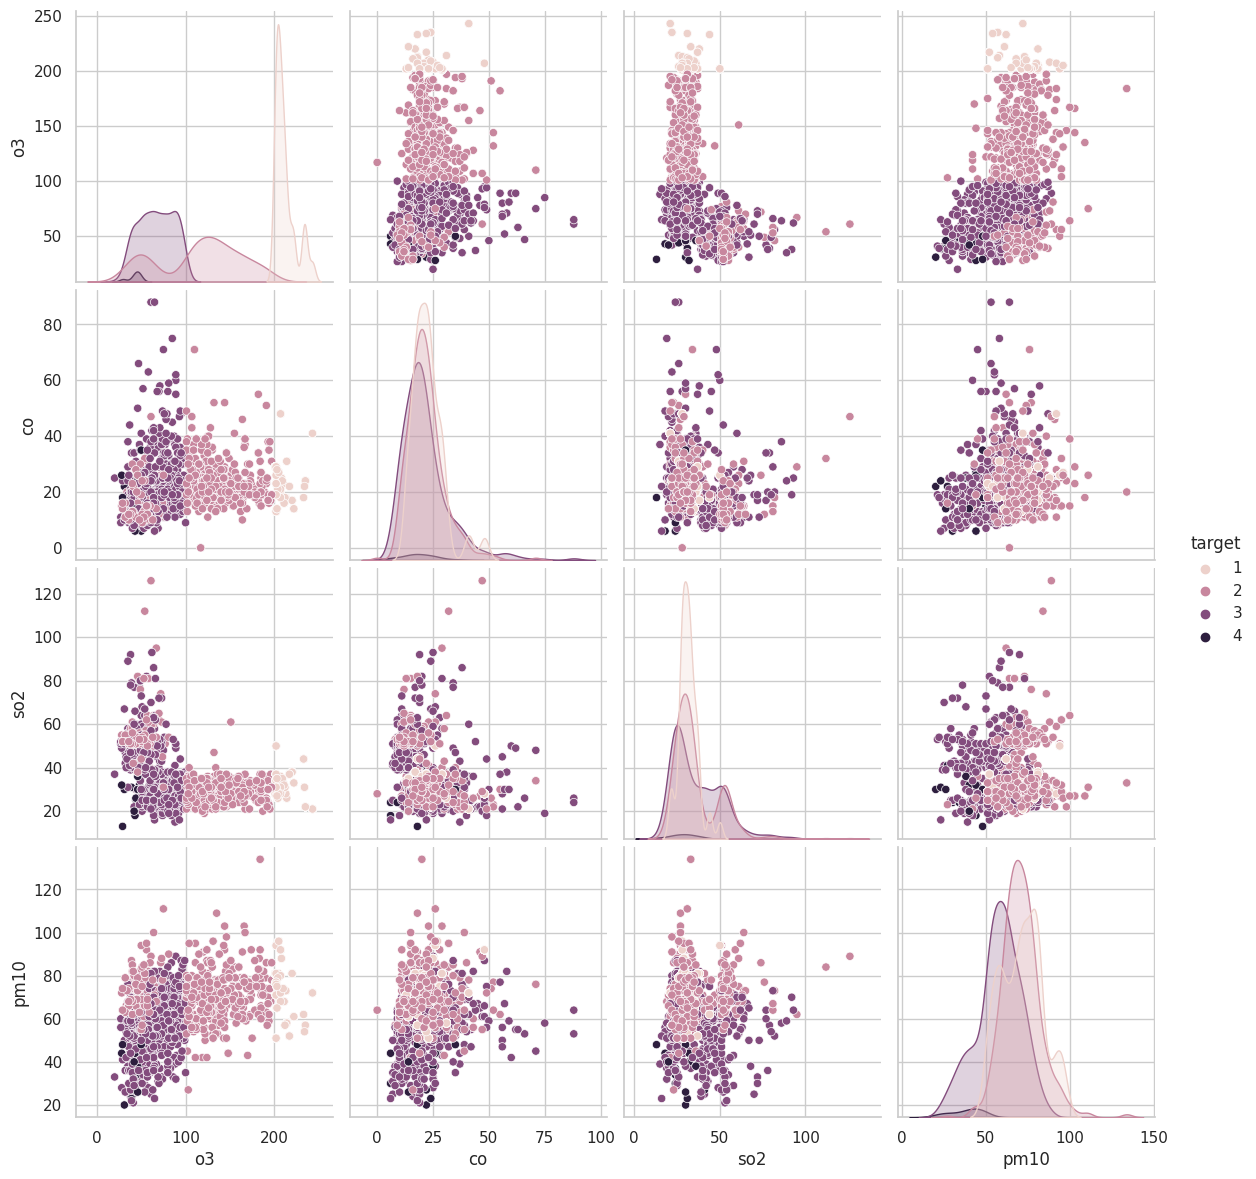

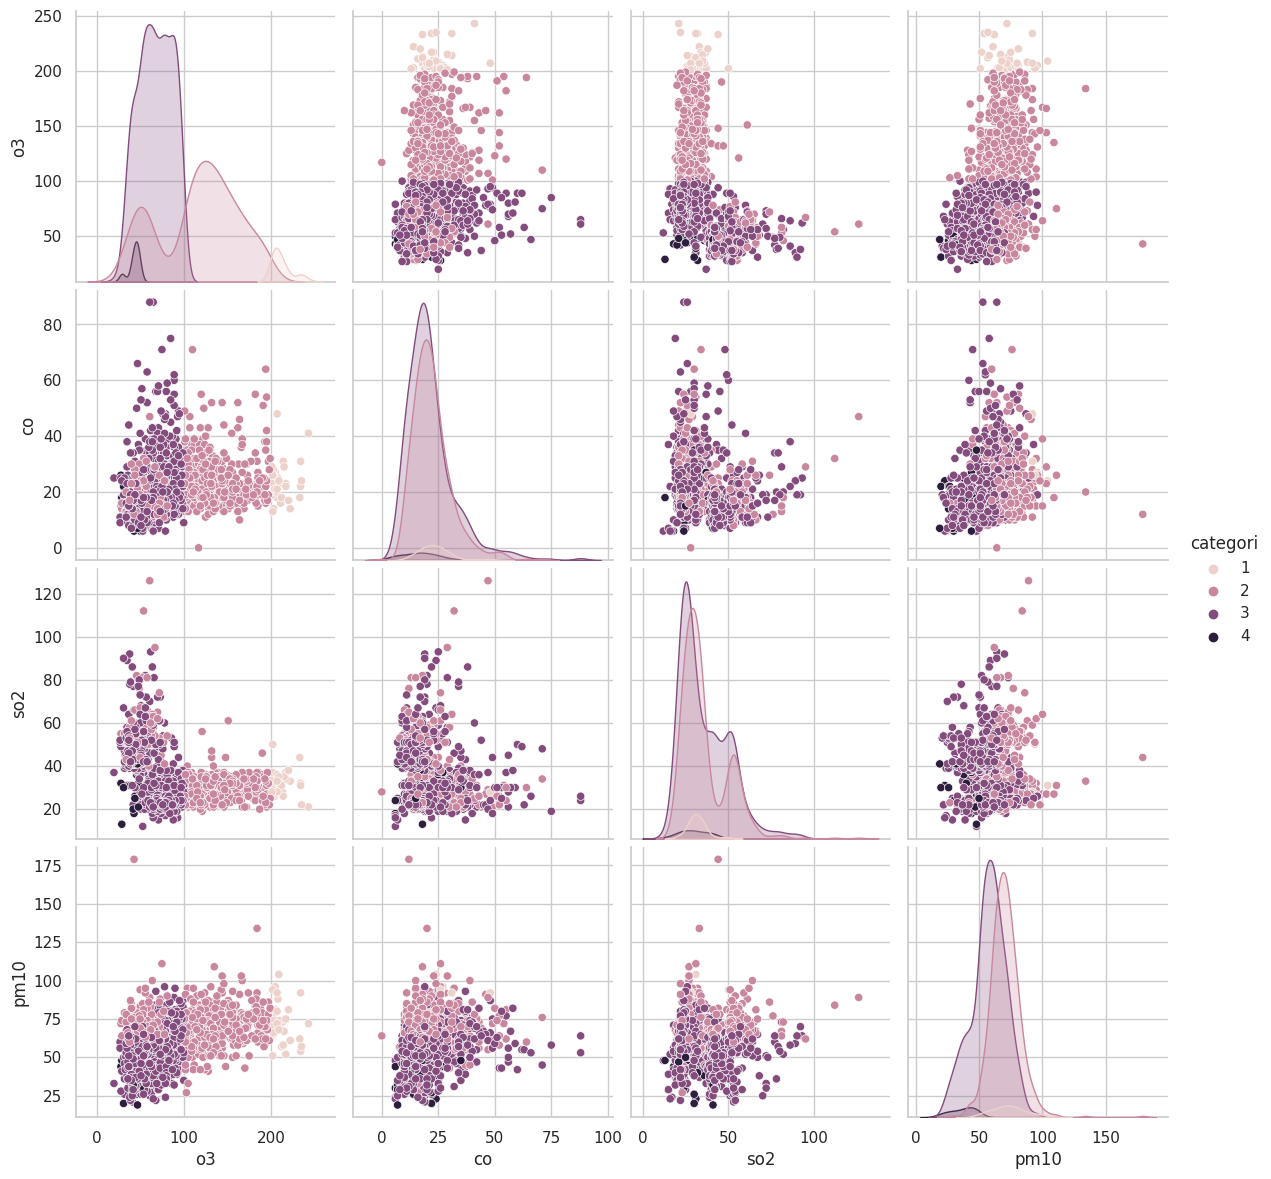

In [ ]:
df_resampled = pd.DataFrame(X_train_resampled9, columns=X_train.columns)
df_resampled['target'] = y_train_resampled9

sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))

sns.pairplot(df_resampled[['o3', 'co', 'so2', 'pm10', 'target']], hue='target', diag_kind='kde', height=3, aspect=1)
plt.show()

sns.pairplot(processed_data[['o3', 'co', 'so2', 'pm10', 'categori']], hue='categori', diag_kind='kde', height=3, aspect=1)
plt.show()

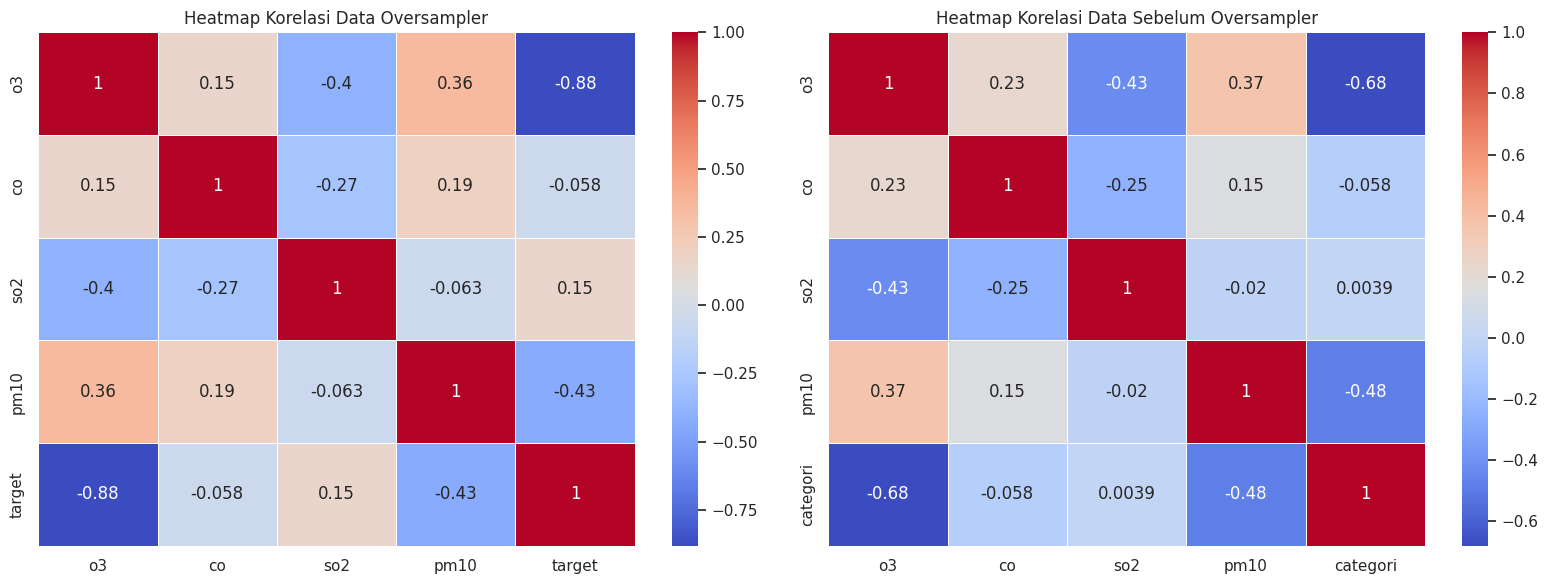

In [ ]:
df_resampledb = pd.DataFrame(X_train_resampled9, columns=X_train.columns)
df_resampledb['target'] = y_train_resampled9

correlation_matrix_oversampler = df_resampledb[['o3', 'co', 'so2', 'pm10', 'target']].corr()

correlation_matrix_original = processed_data[['o3', 'co', 'so2', 'pm10', 'categori']].corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(correlation_matrix_original, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1])
axes[1].set_title('Heatmap Korelasi Data Sebelum Oversampler')

sns.heatmap(correlation_matrix_oversampler, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('Heatmap Korelasi Data Oversampler')

plt.tight_layout()
plt.show()

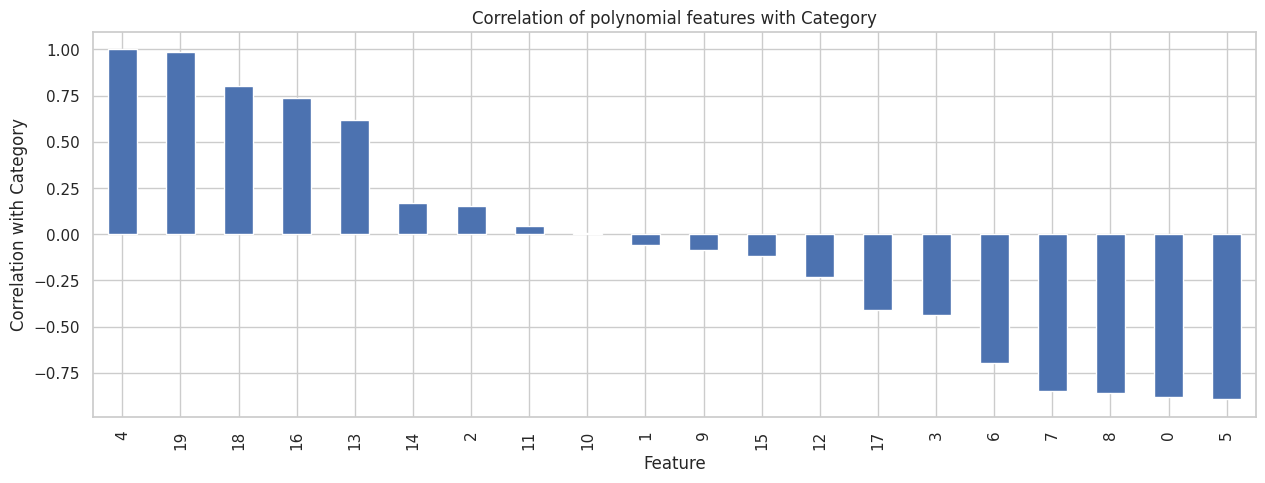

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_train_resampled_poly = poly_features.fit_transform(X_train_resampled9)

df_resampled_poly = pd.DataFrame(X_train_resampled_poly)

df_resampled_poly['target'] = y_train_resampled9

target_corr = df_resampled_poly.corr()["target"]
target_corr = target_corr.sort_values(ascending=False)

plt.figure(figsize=(15, 5))

target_corr[1:].plot(kind="bar")
plt.xlabel("Feature")
plt.ylabel("Correlation with Category")
plt.title("Correlation of polynomial features with Category")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
X_train_resampledvv, y_train_resampledvv = oversampler.fit_resample(X_train, y_train)

gradient_boosting_classifier0 = GradientBoostingClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(gradient_boosting_classifier0, X_train_resampledvv, y_train_resampledvv, cv=5)

train_accuracy = cv_scores.mean()

gradient_boosting_classifier0.fit(X_train_resampledvv, y_train_resampledvv)

test_accuracy = gradient_boosting_classifier0.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9623755474126374
Test Accuracy: 0.9302325581395349


Evaluasi Macro
Akurasi: 0.93
Presisi: 0.88
Recall: 0.82
F1-Score: 0.84

Evaluasi Micro
Akurasi: 0.93
Presisi: 0.93
Recall: 0.93
F1-Score: 0.93


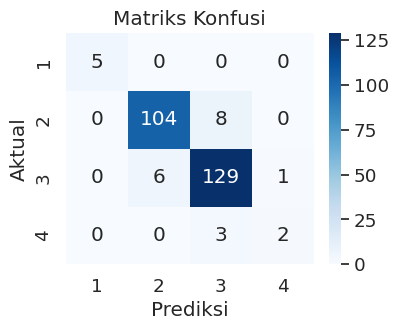

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
gradient_boosting_classifier0.fit(X_train_resampledvv, y_train_resampledvv)

y_pred = gradient_boosting_classifier0.predict(X_test)

print("Evaluasi Macro")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,  average='macro')
f1 = f1_score(y_test, y_pred,  average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy))
print("Presisi: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}\n".format(f1))

print("Evaluasi Micro")
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='micro')
recall1 = recall_score(y_test, y_pred,  average='micro')
f11 = f1_score(y_test, y_pred,  average='micro')

print("Akurasi: {:.2f}".format(accuracy1))
print("Presisi: {:.2f}".format(precision1))
print("Recall: {:.2f}".format(recall1))
print("F1-Score: {:.2f}".format(f11))
class_labels = sorted(set(y_test))

plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()


In [ ]:
# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create oversampled data
X_train_resampledyy, y_train_resampledyy = oversampler.fit_resample(X_train_scaled, y_train)

# Logistic Regression model with increased max_iter
logistic_regression0 = LogisticRegression(max_iter=2000, random_state=42)

# Create a pipeline
logisrek = Pipeline([
    ('Model', logistic_regression0)
])

# Cross-validation
cv_scores = cross_val_score(logisrek, X_train_resampledyy, y_train_resampledyy, cv=5)

train_accuracy = cv_scores.mean()
logisrek.fit(X_train_resampledyy, y_train_resampledyy)

# Test accuracy
X_test_scaled = scaler.transform(X_test)  # Scale the test data using the same scaler
test_accuracy = logistic_regression0.score(X_test_scaled, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.859027616408973
Test Accuracy: 0.751937984496124


In [ ]:
# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fitting model
logistic_regression0.fit(X_train_resampledyy, y_train_resampledyy)

# Scaling test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Predictions
y_pred = logistic_regression0.predict(X_test_scaled)

# Evaluasi Macro
print("Evaluasi Macro")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy))
print("Presisi: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}\n".format(f1))

# Evaluasi Micro
print("Evaluasi Micro")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro', zero_division=1)
recall = recall_score(y_test, y_pred, average='micro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='micro', zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy))
print("Presisi: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


Evaluasi Macro
Akurasi: 0.75
Presisi: 0.73
Recall: 0.63
F1-Score: 0.51

Evaluasi Micro
Akurasi: 0.75
Presisi: 0.75
Recall: 0.75
F1-Score: 0.75


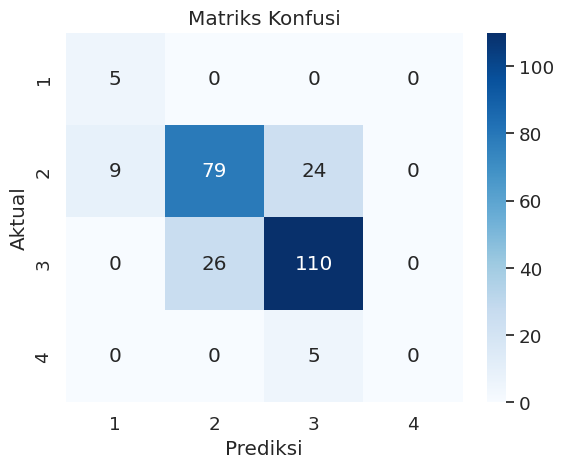

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()

In [ ]:
X_train_resampledtt, y_train_resampledtt = oversampler.fit_resample(X_train, y_train)

decision_tree_classifier0 = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(decision_tree_classifier0, X_train_resampledtt, y_train_resampledtt, cv=5)

train_accuracy = cv_scores.mean()

decision_tree_classifier0.fit(X_train_resampledtt, y_train_resampledtt)

test_accuracy = decision_tree_classifier0.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9617767450174279
Test Accuracy: 0.9263565891472868


Evaluasi Micro
Akurasi: 0.93
Presisi: 0.93
Recall: 0.93
F1-Score: 0.93

Evaluasi Macro
Akurasi: 0.93
Presisi: 0.96
Recall: 0.82
F1-Score: 0.86


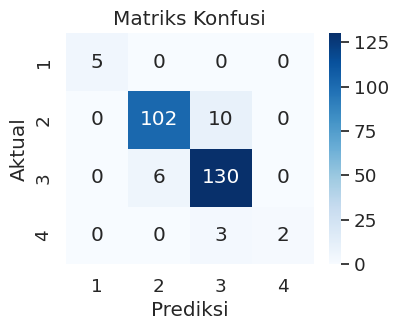

In [ ]:
decision_tree_classifier0.fit(X_train_resampledtt, y_train_resampledtt)

y_pred = decision_tree_classifier0.predict(X_test)

print("Evaluasi Micro")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred,  average='micro')
f1 = f1_score(y_test, y_pred,  average='micro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy))
print("Presisi: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}\n".format(f1))

print("Evaluasi Macro")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,  average='macro')
f1 = f1_score(y_test, y_pred,  average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy))
print("Presisi: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train_resampledrr, y_train_resampledrr = oversampler.fit_resample(X_train, y_train)

random_forest_classifier0 = RandomForestClassifier(n_estimators=1000, random_state=42)

cv_scores = cross_val_score(random_forest_classifier0, X_train_resampledrr, y_train_resampledrr, cv=5)

train_accuracy = cv_scores.mean()

random_forest_classifier0.fit(X_train_resampledrr, y_train_resampledrr)

test_accuracy = random_forest_classifier0.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9683456966663687
Test Accuracy: 0.937984496124031


In [ ]:
random_forest_classifier0.fit(X_train_resampledrr, y_train_resampledrr)

y_pred = random_forest_classifier0.predict(X_test)

print("Evaluasi Micro")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred,  average='micro')
f1 = f1_score(y_test, y_pred,  average='micro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy))
print("Presisi: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}\n".format(f1))

print("Evaluasi Macro")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,  average='macro')
f1 = f1_score(y_test, y_pred,  average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy))
print("Presisi: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

Evaluasi Micro
Akurasi: 0.94
Presisi: 0.94
Recall: 0.94
F1-Score: 0.94

Evaluasi Macro
Akurasi: 0.94
Presisi: 0.97
Recall: 0.82
F1-Score: 0.86


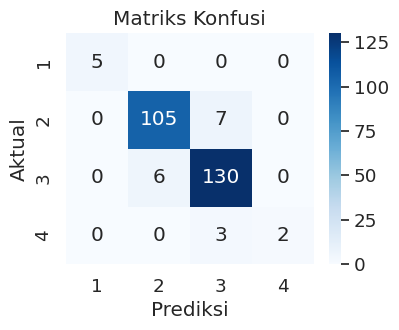

In [ ]:
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()
